In [1]:
%load_ext jupyter_black

In [2]:
import pandas as pd
import xarray as xr
import eurostat
import matplotlib.pyplot as plt
import pycountry

plt.style.use("ggplot")

In [3]:
dataset_code = "nrg_cb_rw"

# Download csv data

In [4]:
df_dataset = eurostat.get_toc_df()
df_dataset.head()

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-05-03T23:00:00+0200,2024-03-26T23:00:00+0100,1997-Q1,2023-Q4
1,Gross weight of goods handled in main ports by...,MAR_GO_QMC,dataset,2024-05-03T23:00:00+0200,2024-03-26T23:00:00+0100,1997-Q1,2023-Q4
2,Gross weight of goods transported to/from main...,MAR_GO_QM_BE,dataset,2024-03-26T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q3
3,Gross weight of goods transported to/from main...,MAR_GO_QM_BG,dataset,2024-03-18T23:00:00+0100,2024-03-18T23:00:00+0100,2001-Q1,2023-Q4
4,Volume of containers transported to/from main ...,MAR_GO_QM_C1999,dataset,2018-07-09T23:00:00+0200,2023-11-22T11:00:00+0100,1997-Q1,1999-Q4


In [5]:
parameters = eurostat.get_pars(dataset_code)
parameters

['freq', 'nrg_bal', 'siec', 'unit', 'geo']

In [6]:
for parameter in parameters:
    print(parameter)
    values = eurostat.get_par_values(dataset_code, parameter)
    print(values)

freq
['A']
nrg_bal
['IPRD', 'IMP', 'EXP', 'STK_CHG', 'INTMARB', 'IC_CAL', 'INTAVI_E', 'INTAVI_NE', 'TI_E', 'TI_EHG_MAPE_E', 'TI_EHG_MAPCHP_E', 'TI_EHG_MAPH_E', 'TI_EHG_APE_E', 'TI_EHG_APCHP_E', 'TI_EHG_APH_E', 'TI_BF_E', 'TI_GW_E', 'TI_PF_E', 'TI_BKBPB_E', 'TI_BNG_E', 'TI_LBB_E', 'TI_CPP_E', 'TI_GTL', 'TI_STG', 'TI_STL', 'TI_LTG', 'TI_LTL', 'TI_NSP_E', 'NRG_E', 'NRG_EHG_E', 'NRG_CM_E', 'NRG_CM_NE', 'NRG_OIL_NG_NE', 'NRG_PF_E', 'NRG_CO_E', 'NRG_CO_NE', 'NRG_BKBPB_E', 'NRG_GW_E', 'NRG_GW_NE', 'NRG_BF_E', 'NRG_BF_NE', 'NRG_PR_E', 'NRG_BIOG_E', 'NRG_CPP_E', 'NRG_NSP_E', 'NRG_NSP_NE', 'DL', 'FC', 'FC_NE', 'NRG_NE', 'FC_IND_NE', 'FC_TRA_NE', 'FC_OTH_NE', 'FC_E', 'FC_IND_E', 'FC_IND_IS_E', 'FC_IND_IS_NE', 'FC_IND_CPC_E', 'FC_IND_CPC_NE', 'FC_IND_NFM_E', 'FC_IND_NFM_NE', 'FC_IND_NMM_E', 'FC_IND_NMM_NE', 'FC_IND_TE_E', 'FC_IND_TE_NE', 'FC_IND_MAC_E', 'FC_IND_MAC_NE', 'FC_IND_MQ_E', 'FC_IND_MQ_NE', 'FC_IND_FBT_E', 'FC_IND_FBT_NE', 'FC_IND_PPP_E', 'FC_IND_PPP_NE', 'FC_IND_WP_E', 'FC_IND_WP_NE', '

In [7]:
dic = eurostat.get_dic(dataset_code)
dic

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('nrg_bal',
  'Energy balance',
  'This code list refers to the flows used for the energy balances.'),
 ('siec',
  'Standard international energy product classification (SIEC)',
  'This code list contains the energy products according to the Standard International Energy Product Classification (SIEC) which has been developped as part of the International Recommendations for Energy Statistics (IRES) adopted by the UNSD.'),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

In [8]:
dict_siec = eurostat.get_dic(dataset_code, "siec", frmt="dict")
dict_nrg = eurostat.get_dic(dataset_code, "nrg_bal", frmt="dict")

In [9]:
dict_siec

{'TOTAL': 'Total',
 'CF': 'Combustible fuels',
 'CF_R': 'Combustible fuels - renewable',
 'CF_NR': 'Combustible fuels - non-renewable',
 'CF_NR_OTH': 'Combustible fuels - non-renewable - other',
 'FF': 'Fossil fuels',
 'SFF_P1000': 'Solid fossil fuels and peat',
 'SFF_P1000_S2000': 'Solid fossil fuels, peat, peat products, oil shale and oil sands',
 'C0000': 'Coal and manufactured gases',
 'C0000X0350-0370': 'Solid fossil fuels',
 'C0100': 'Hard coal',
 'C0110': 'Anthracite',
 'C0120': 'Bituminous coal',
 'C0121': 'Coking coal',
 'C0129': 'Other bituminous coal',
 'C0200': 'Brown coal',
 'C0210': 'Sub-bituminous coal',
 'C0220': 'Lignite',
 'C0300': 'Coal products',
 'C0310': 'Coal coke',
 'C0311': 'Coke oven coke',
 'C0312': 'Gas coke',
 'C0313': 'Coke breeze',
 'C0314': 'Semi cokes',
 'C0320': 'Patent fuel',
 'C0330': 'Brown coal briquettes',
 'C0340': 'Coal tar',
 'C0350-0370': 'Manufactured gases',
 'C0350': 'Coke oven gas',
 'C0360': 'Gas works gas',
 'C0370': 'Recovered gases',
 

In [10]:
df = eurostat.get_data_df(dataset_code)
df.head()

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,DL,R5110-5150_W6000RI,TJ,AL,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,DL,R5110-5150_W6000RI,TJ,AT,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,DL,R5110-5150_W6000RI,TJ,BA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,DL,R5110-5150_W6000RI,TJ,BE,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,DL,R5110-5150_W6000RI,TJ,BG,0.0,0.0,0.0,2.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df["siec_name"] = df.siec.replace(dict_siec)
df["nrg_bal_name"] = df.nrg_bal.replace(dict_nrg)
df = df.rename(columns={"geo\TIME_PERIOD": "geo"})

In [12]:
df = df[
    [
        "freq",
        "siec",
        "siec_name",
        "nrg_bal",
        "nrg_bal_name",
        "unit",
        "geo",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]

In [13]:
df.head()

,freq,siec,siec_name,nrg_bal,nrg_bal_name,unit,geo,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,R5110-5150_W6000RI,Primary solid biofuels,DL,Distribution losses,TJ,AL,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,R5110-5150_W6000RI,Primary solid biofuels,DL,Distribution losses,TJ,AT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,R5110-5150_W6000RI,Primary solid biofuels,DL,Distribution losses,TJ,BA,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,R5110-5150_W6000RI,Primary solid biofuels,DL,Distribution losses,TJ,BE,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,R5110-5150_W6000RI,Primary solid biofuels,DL,Distribution losses,TJ,BG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.to_csv(f"data/{dataset_code}.csv")

# Create a nice dataset file

In [15]:
df = pd.read_csv(f"data/{dataset_code}.csv", index_col=0)
df = df[df.unit == "TJ"]
df = df.set_index(["siec_name", "nrg_bal_name", "geo"])[
    [
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]
df.columns = pd.to_datetime(df.columns)
df.columns.name = "Year"
df.head()

Year                                            2004-01-01  2005-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          NaN         NaN   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2006-01-01  2007-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          NaN         NaN   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2008-01-01  2009-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          NaN         NaN   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2010-01-01  2011-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          NaN         NaN   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2012-01-01  2013-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          NaN         NaN   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2014-01-01  2015-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          0.0         0.0   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2016-01-01  2017-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          0.0         0.0   
                                           BE          0.0         0.0   
                                           BG          0.0         0.0   

Year                                            2018-01-01  2019-01-01  \
siec_name              nrg_bal_name        geo                           
Primary solid biofuels Distribution losses AL          0.0         0.0   
                                           AT          0.0         0.0   
                                           BA          0.0         0.0 

In [16]:
ds = df.stack().to_xarray()
ds

<xarray.DataArray (siec_name: 20, nrg_bal_name: 109, geo: 43, Year: 19)> Size: 14MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * siec_name     (siec_name) object 160B 'Ambient heat (heat pumps)' ... 'Wo...
  * nrg_bal_name  (nrg_bal_name) object 872B 'Change in stock' ... 'Transform...
  * geo           (geo) object 344B 'AL' 'AT' 'BA' 'BE' ... 'TR' 'UA' 'UK' 'XK'
  * Year          (Year) datetime64[ns] 152B 2004-01-01 ... 2022-01-01

In [17]:
ds.to_netcdf(f"data/{dataset_code}.nc")

# Graph

In [18]:
ds = xr.open_dataarray(f"data/{dataset_code}.nc")
ds

<xarray.DataArray (siec_name: 20, nrg_bal_name: 109, geo: 43, Year: 19)> Size: 14MB
[1781060 values with dtype=float64]
Coordinates:
  * nrg_bal_name  (nrg_bal_name) object 872B 'Change in stock' ... 'Transform...
  * geo           (geo) object 344B 'AL' 'AT' 'BA' 'BE' ... 'TR' 'UA' 'UK' 'XK'
  * siec_name     (siec_name) object 160B 'Ambient heat (heat pumps)' ... 'Wo...
  * Year          (Year) datetime64[ns] 152B 2004-01-01 ... 2022-01-01

In [19]:
dict_nrg

{'TOTAL': 'Total',
 'PRD': 'Production',
 'PPRD': 'Primary production',
 'PPRD_RED': 'Primary production - Renewable Energy Directive',
 'IPRD': 'Indigenous production',
 'IPRD_AG': 'Indigenous production - associated gas',
 'IPRD_NAG': 'Indigenous production - non-associated gas',
 'IPRD_CG': 'Indigenous production - colliery gas',
 'IPRD_SB': 'Indigenous production - solid biofuels',
 'IPRD_LB': 'Indigenous production - liquid biofuels',
 'IPRD_GB': 'Indigenous production - gaseous biofuels',
 'UPRD': 'Underground production',
 'SPRD': 'Surface production',
 'NPRD': 'Net production',
 'PRD_OTH': 'Other production',
 'TOS': 'Transfer from other sources',
 'TOS_OIL': 'Transfer from other sources - oil',
 'TOS_COAL': 'Transfer from other sources - coal',
 'TOS_REN': 'Transfer from other sources - renewables',
 'TOS_NGAS': 'Transfer from other sources - natural gas',
 'IDCO': 'Into direct carry-over',
 'FDCO': 'From direct carry-over',
 'RCV_RCY': 'Recovered and recycled products',
 'IMP

In [21]:
dict_siec

{'TOTAL': 'Total',
 'CF': 'Combustible fuels',
 'CF_R': 'Combustible fuels - renewable',
 'CF_NR': 'Combustible fuels - non-renewable',
 'CF_NR_OTH': 'Combustible fuels - non-renewable - other',
 'FF': 'Fossil fuels',
 'SFF_P1000': 'Solid fossil fuels and peat',
 'SFF_P1000_S2000': 'Solid fossil fuels, peat, peat products, oil shale and oil sands',
 'C0000': 'Coal and manufactured gases',
 'C0000X0350-0370': 'Solid fossil fuels',
 'C0100': 'Hard coal',
 'C0110': 'Anthracite',
 'C0120': 'Bituminous coal',
 'C0121': 'Coking coal',
 'C0129': 'Other bituminous coal',
 'C0200': 'Brown coal',
 'C0210': 'Sub-bituminous coal',
 'C0220': 'Lignite',
 'C0300': 'Coal products',
 'C0310': 'Coal coke',
 'C0311': 'Coke oven coke',
 'C0312': 'Gas coke',
 'C0313': 'Coke breeze',
 'C0314': 'Semi cokes',
 'C0320': 'Patent fuel',
 'C0330': 'Brown coal briquettes',
 'C0340': 'Coal tar',
 'C0350-0370': 'Manufactured gases',
 'C0350': 'Coke oven gas',
 'C0360': 'Gas works gas',
 'C0370': 'Recovered gases',
 

In [20]:
["Indigenous production", "Inland consumption", "Imports", "Net imports", "Exports"]

['Indigenous production',
 'Inland consumption',
 'Imports',
 'Net imports',
 'Exports']

In [78]:
list_siec = [
    "Liquid biofuels",
    "Sustainable biofuels Annex IX, Part A",
    "Sustainable biofuels Annex IX, Part B",
    "Biogases",
]
list_nrg_bal_name = [
    "Final consumption - other transport sector- energy use - Renewable Energy Directive",
    "Final consumption - transport sector - energy use - Renewable Energy Directive",
    "Final consumption - transport sector - rail - energy use - Renewable Energy Directive",
    "Final consumption - transport sector - road - energy use - Renewable Energy Directive",
]
year = "2022"

/tmp/ipykernel_1845/288740879.py:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("geo")


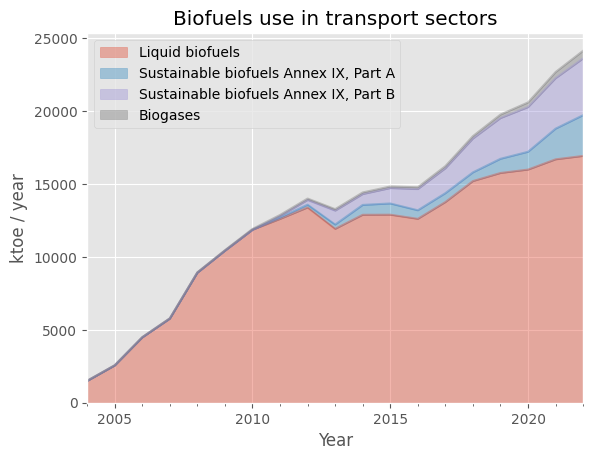

In [79]:
# geo "EU27_2020", "EA20"
dsp = (
    ds.sel(geo="EU27_2020")
    .drop("geo")
    .sel(siec_name=list_siec)
    .sel(nrg_bal_name=list_nrg_bal_name)
).sum(dim="nrg_bal_name")
dfp = dsp.to_dataset("siec_name").to_dataframe()

fig, ax = plt.subplots()
dfp.plot(ax=ax, kind="area", alpha=0.4)
ax.set_ylabel("ktoe / year")
ax.set_title("Biofuels use in transport sectors")
plt.savefig("plot/biofuel_trend.png")

In [80]:
# geo "EU27_2020", "EA20"
dsp = (
    (ds.sel(siec_name=list_siec).sel(nrg_bal_name=list_nrg_bal_name))
    .sum(dim="nrg_bal_name")
    .sel(Year=year)
    .drop_vars("Year")
    .squeeze()
)
dsp

<xarray.DataArray (siec_name: 4, geo: 41)> Size: 1kB
array([[0.0000000e+00, 4.0277200e+02, 0.0000000e+00, 7.6296000e+02,
        1.8609400e+02, 2.4890000e+01, 3.2301500e+02, 2.9576310e+03,
        2.4479000e+02, 1.2559355e+04, 2.8020000e+01, 2.1733200e+02,
        1.4461830e+03, 1.6933841e+04, 5.4495800e+02, 3.0965210e+03,
        0.0000000e+00, 2.1000000e+01, 3.0290000e+02, 2.2963200e+02,
        2.2290000e+01, 1.3890700e+03, 1.1960000e+02, 1.2772000e+02,
        1.5754000e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.2609000e+01, 5.7321200e+02, 3.4507900e+02, 1.2034210e+03,
        3.4111000e+02, 5.5868000e+02, 0.0000000e+00, 1.5555860e+03,
        7.9712000e+01, 1.6867000e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8420000e+01,
        9.5500000e+00, 3.5500000e+00, 4.8454000e+01, 4.6412200e+02,
        1.2660000e+01, 2.4573860e+03, 3.0105000e+01, 0.0000000e+00,
        7.6766300e+02, 2.7989060e+03, 7.7899000e+01, 1.3908400e+02,
        0.0000000e+00, 0.0000000e+00, 3.6800000e+01, 1.8920000e+01,
        1.8600000e+00, 6.1287200e+02, 5.6000000e+00, 3.2550000e+00,
        4.7320000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.6100000e-01, 1.6845800e+02, 2.7093000e+01, 2.5070000e+00,
        9.6302000e+01, 0.0000000e+00, 0.0000000e+00, 2.3154900e+02,
...
        1.8160000e+01, 3.0494850e+03, 8.9200000e-01, 3.4873000e+01,
        4.0127900e+02, 3.8921920e+03, 5.7080000e+00, 2.0002300e+02,
        0.0000000e+00, 9.4090000e+00, 1.2730000e+02, 1.8756800e+02,
        0.0000000e+00, 8.5760500e+02, 2.9000000e+00, 4.9773000e+01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.1846000e+01, 2.9939400e+02, 3.0259400e+02, 2.7448000e+01,
        1.7200400e+02, 0.0000000e+00, 0.0000000e+00, 5.6548500e+02,
        4.1790000e+01, 4.1210000e+01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 3.8700000e-01, 0.0000000e+00, 6.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 3.9121000e+01, 9.1273000e+01,
        8.7900000e+00, 3.6123400e+02, 1.2870000e+01, 0.0000000e+00,
        0.0000000e+00, 5.2942400e+02, 2.6518000e+01, 3.6470000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.4500000e-01,
        1.8600000e+00, 1.8486900e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.0666000e+01, 3.1841000e+01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2027900e+02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]])
Coordinates:
  * geo        (geo) object 328B 'AL' 'AT' 'BA' 'BE' ... 'SK' 'TR' 'UK' 'XK'
  * siec_name  (siec_name) object 32B 'Liquid biofuels' ... 'Biogases'

In [81]:
def get_country_name(country_code):
    match country_code:
        case "XK":
            country_name = "Kosovo"
        case "EL":
            country_name = "Greece"
        case "UK":
            country_name = "United Kingdom"
        case _:
            country_name = pycountry.countries.get(alpha_2=country_code).name
    return country_name

In [82]:
dfp = dsp.to_dataset("siec_name").to_dataframe()
dfp = dfp.drop(["EU27_2020", "EA20", "UK"])
dfp["Total"] = dfp.sum(axis=1)
dfp = dfp.sort_values("Total", ascending=True)
dfp = dfp.drop("Total", axis=1)

dfp.index = [get_country_name(idx) for idx in dfp.index]
dfp.tail(10)

,Liquid biofuels,"Sustainable biofuels Annex IX, Part A","Sustainable biofuels Annex IX, Part B",Biogases
Finland,544.958,77.899,5.708,26.518
Norway,345.079,27.093,302.594,31.841
Belgium,762.960,28.420,55.314,0.060
Netherlands,573.212,168.458,299.394,40.666
Poland,1203.421,2.507,27.448,0.000
Sweden,1555.586,231.549,565.485,120.279
Spain,1446.183,767.663,401.279,0.000
Italy,1389.070,612.872,857.605,184.869
France,3096.521,139.084,200.023,3.647
Germany,2957.631,464.122,640.324,91.273


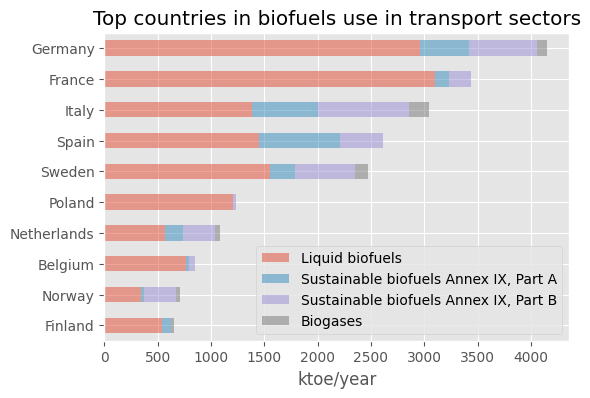

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
dfp.iloc[-10:].plot(kind="barh", stacked=True, ax=ax, alpha=0.5)
ax.set_xlabel("ktoe/year")
ax.set_title("Top countries in biofuels use in transport sectors")
fig.savefig("plot/top_countries.png", bbox_inches="tight")